Clase 2(a) - Corrección Radiométrica de Imágenes Satelitales
===========================================

### SoPI II: Herramientas de teledetección cuantitativa

En esta clase nos centraremos en la corrección radiométrica de firmas espectrales 

Se utilizara este notebook de python para ayudar en el procesamiento y la visualización de las mismas.

Los notebooks se dividen de la siguiente manera

- **(a)** Ajustar el valor mínimo del histograma a una curva $L_0\times\lambda^{-\gamma}$
- (b) Calcular los parámetros de corrección con Py6S
- (c) Graficar las firmas espectrales con varias correcciones


### Carga de librerias

Recuerde que debe ejecutar **siempre** primero la celda que carga las librerias para ejecutar los procesos.

Durante esta clase utilizaremos las librerias

- [matplotlib](http://matplotlib.org/) para generación de gráficos.
- [numpy](http://www.numpy.org/) para el procesamiento numérico y matricial.
- [scipy](http://www.scipy.org) para realizar los ajustes

Para graficar firmas espectrales con `matplotlib` debemos darle dos arrays con valores. El primero de ellos son las posiciones de `x` para el grafico y el segundo son las posiciones de `y`.

In [2]:
# Cargamos las librerais
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Fijamos que muestre los graficos dentro de la linea
%matplotlib inline

### Ajuste de firmas espectrales

Para ajustar los minimos con `scipy` debemos primero cargar los mimos para cada longitud de onda

In [3]:
# Valores de longitud de onda para landsat 8
x = [482,561,655,864,1608,2200]
# Valores de reflectancia
y = [700,400,150,50,5,1]

podemos luego graficar a los mismos

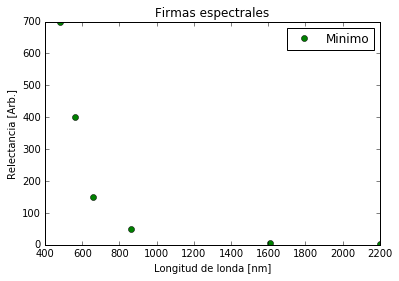

In [4]:
# Grafico
plt.plot(x,y,linestyle = "None", marker='o', color="red", label="Minimo")

# Configuraciones de ploteo. 
# Cambiar bajo su propio riesgo
# Incluyo la leyenda
plt.legend(numpoints=1)
# Pongo nombres a los ejes
plt.xlabel("Longitud de londa [nm]")
plt.ylabel("Relectancia [Arb.]")
# Pongo titulo
plt.title("Firmas espectrales")

# Muestro el grafico
plt.show()

Si calculamos el logaritmo de la expresión anterior obtenemos

$$ \log L_{min} = -\gamma \log \lambda + \log L_0 $$

por lo tanto, si graficamos $\log L_{min}$ contra $\log \lambda$ tenemos una recta de pendiente negativa

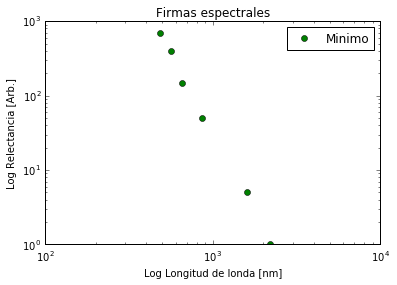

In [5]:
# Grafico
plt.loglog(x,y,linestyle = "None", marker='o', color="red", label="Minimo")

# Configuraciones de ploteo. 
# Cambiar bajo su propio riesgo
# Incluyo la leyenda
plt.legend(numpoints=1)
# Pongo nombres a los ejes
plt.xlabel("Log Longitud de londa [nm]")
plt.ylabel("Log Relectancia [Arb.]")
# Pongo titulo
plt.title("Firmas espectrales")

# Muestro el grafico
plt.show()

para hacer el ajuste, utilizaremos la funcion linregress de scipy como `stats.linregress()` donde los valores de `x` y de `y` serán los correspondientes logaritmos. Mostramos luego los valores obtenidos

In [21]:
# Hago el ajuste
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(x),np.log(y))
# Muestro los valores obtenidos
print("Pendiente:", slope)
print("Ordenada:", intercept)
print("R2:", r_value)

Pendiente: -4.21874535552
Ordenada: 32.5563269873
R2: -0.998189312758


por lo tanto podemos calcular los valores ajustados como y mostrarlos como

In [80]:
# Calculo el ajuste de valores a x
z = np.exp(intercept) * x ** (slope)

WL[nm] 	 L[arb]
  482 	  660.6
  561 	  348.2
  655 	  181.1
  864 	   56.3
 1608 	    4.1
 2200 	    1.1


para mostrarlos, crearemos una pequeña tabla usando un ciclo `for` en todos los valores

In [96]:
# Imprimimos la tabla de valores obtenidos
print(" WL[nm]  L[arb]")
print("----------------")
# {:5d} escribe un numero entero con 5 lugares
# {:4.0f} escribe un numero florante, con 4 lugares y sin parte decimal
# \t incerta un tabulador
for i in range(len(x)):
    print("{:6d} \t  {:4.0f}".format(x[i],z[i]))

 WL[nm]  L[arb]
----------------
   482 	   661
   561 	   348
   655 	   181
   864 	    56
  1608 	     4
  2200 	     1


Graficamos los valores obtenidos y los valores ajustados

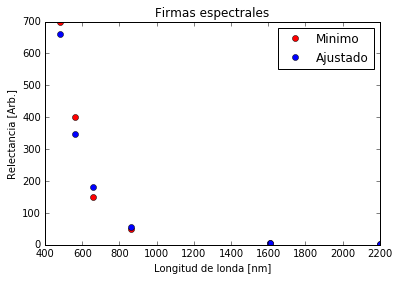

In [20]:
# Grafico
plt.plot(x,y,linestyle = "None", marker='o', color="red", label="Minimo")
plt.plot(x,z,linestyle = "None", marker='o', color="blue", label="Ajustado")

# Configuraciones de ploteo. 
# Cambiar bajo su propio riesgo
# Incluyo la leyenda
plt.legend(numpoints=1)
# Pongo nombres a los ejes
plt.xlabel("Longitud de londa [nm]")
plt.ylabel("Relectancia [Arb.]")
# Pongo titulo
plt.title("Firmas espectrales")

# Muestro el grafico
plt.show()

O en un grafico `log-log`

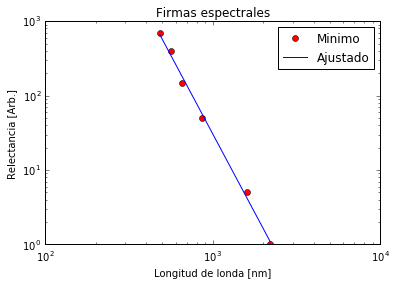

In [19]:
# Grafico
plt.loglog(x,y,linestyle = "None", marker='o', color="red", label="Minimo")
plt.loglog(x,z,linestyle = "-", marker='None', color="blue", label="Ajustado")

# Configuraciones de ploteo. 
# Cambiar bajo su propio riesgo
# Incluyo la leyenda
plt.legend(numpoints=1)
# Pongo nombres a los ejes
plt.xlabel("Longitud de londa [nm]")
plt.ylabel("Relectancia [Arb.]")
# Pongo titulo
plt.title("Firmas espectrales")

# Muestro el grafico
plt.show()